# DEEP FAKE COMPSCI 760

# Datasets

In [15]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

2.13.0
False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [12]:
import zipfile
from PIL import Image
import io
import matplotlib.pyplot as plt
from glob import glob

In [4]:
#Generate CLAHE images into separate directories

import cv2
import os
clipLimit = 7.0
tileGridSize = (15,15)


def apply_clahe(input_path, output_path):
    image = cv2.imread(input_path)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
    cv2.imwrite(output_path, image_clahe)

    
raw_dir = "./low-quality/fake"
output_dir = "./low-quality-clahe/fake"
def apply_clahe_dir(raw_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for currentDir in list(glob(raw_dir + "/*.jpg")):
        fileName = currentDir.split("\\")[-1]
        apply_clahe(currentDir, output_dir + "/" + fileName)
        
apply_clahe_dir("./low-quality/fake", "./low-quality-clahe/fake")
apply_clahe_dir("./high-quality/fake", "./high-quality-clahe/fake")
apply_clahe_dir("./low-quality/real", "./low-quality-clahe/real")
apply_clahe_dir("./high-quality/real", "./high-quality-clahe/real")
    
    


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 32
img_height = 180
img_width = 180


def get_model(data_dir):

    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset="training",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size)

    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset="validation",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    class_names = train_ds.class_names
    num_classes = len(class_names)

    model = Sequential([
      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model,train_ds,val_ds
epochs=10
def run_model(model, train_ds, val_ds):
    
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs
    )
    return history





In [9]:

def test_model(data_dir):
    model,train_ds,val_ds = get_model(data_dir)
    model.summary()
    history = run_model(model, train_ds, val_ds)

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Found 1727 files belonging to 2 classes.
Using 1382 files for training.
Found 1727 files belonging to 2 classes.
Using 345 files for validation.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                    

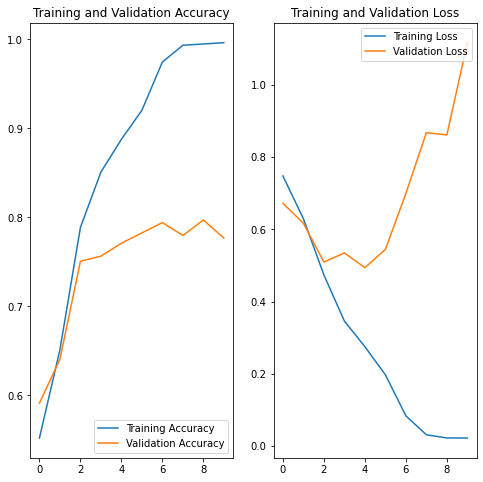

In [10]:
test_model("./low-quality-clahe")

Found 1727 files belonging to 2 classes.
Using 1382 files for training.
Found 1727 files belonging to 2 classes.
Using 345 files for validation.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                    

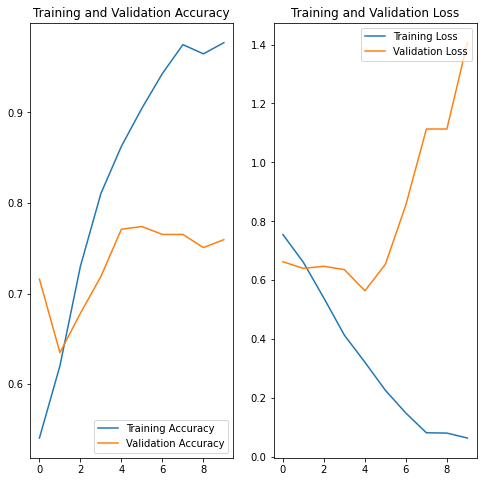

In [13]:
test_model("./low-quality")